# CASE AFRODEV – SACOLÃO

&ensp;&ensp;&ensp;&ensp; Os engenheiros de dados da rede de Supermercados SACOLÃO coletaram dados de vendas
para 1559 produtos distintos em 10 lojas localizadas em diferentes cidades. Cada loja também
conta com alguns atributos únicos que estão descritos mais abaixo.

&ensp;&ensp;&ensp;&ensp; Enquanto um Analista de Dados e aspirante a Cientista de Dados da SACOLÃO, o seu objetivo é
construir um relatório analítico que dê a diretoria da empresa insights relevantes sobre as
vendas desses produtos nessas lojas da SACOLÃO. Além disso, foi solicitado um modelo preditivo que preveja com alguma significância as vendas de cada produto em um determinado ponto de venda.

&ensp;&ensp;&ensp;&ensp; Usando este relatório analítico e este modelo, a direção da SACOLÃO tentará entender as
propriedades dos produtos e pontos de venda que desempenham um papel fundamental no
aumento das vendas. Oberve que os dados podem ter valores ausentes, pois algumas lojas podem não ter relatado
todos os dados devido a falhas técnicas. Portanto, será necessário tratá-los adequadamente.

### Descrição das Variáveis

| Coluna  | Descrição |
| :- | :- |
|Peso       |  Peso dos produtos|
|PerGordura | Especifica se o produto tem baixo teor de gordura ou não|
|Visibilidade | Porcentagem da área total de exibição de todos os produtos em uma loja alocada para o produto específico|
|TipoProduto  | Categoria à qual o produto pertence|
|PrecoMax     | Preço máximo de varejo (preço listado) dos produtos|
|IDLoja       | ID exclusivo da loja|
|AnoLoja      | Ano de criação dos pontos de venda|
|TamanhoLoja  | Tamanho da loja em termos de área coberta|
|LocalizacaoTipo | Tipo de cidade em que a loja está localizada|
|TipoLoja       | Especifica se o ponto de venda é apenas uma mercearia ou algum tipo de supermercado| 
|Vendas   | Vendas do produto na loja específica – Variável Target|


Devemos retirar dos dados apresentados no arquivo "Dados_treino.xls" as informações que ajude o cliente a aumentar as vendas do SACOLÃO.

Vamos iniciar o nosso projeto carregando as bibliotecas necessárias e carregando as variáveis "df_treino" e "df_teste"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
%matplotlib inline

In [3]:
sns.set(style='whitegrid')

In [4]:
df_treino = pd.read_excel('../data/Dados_treino.xls', index_col=0)
df_teste = pd.read_excel('../data/Dados_teste.xls', index_col=0)

Apresentando as dez últimas linhas do conteúdo dos dataframes "df_treino" e "df_teste":

In [5]:
df_treino.tail(10)

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja,Vendas
8513,1552R,180.000,Normal,2.040730,carnes,99.9042,L9,2014,pequena,Sul,Atacado,892.8378
8514,275O,225.000,Normal,5.448853,produtos enlatados,57.5904,L6,2012,NaN,Sul,Atacado,703.0848
8515,902R,310.500,Baixo,2.151844,panificacao,157.5288,L2,2019,medio_porte,Norte,Varejo,2356.9320
8516,1473Q,279.000,Baixo,11.866143,outros,58.7588,L2,2019,medio_porte,Norte,Varejo,1288.3230
8517,540T,311.250,normal,8.360656,congelada,178.8318,L8,2007,pequena,Sudeste,Atacado,5412.9540
8518,360V,102.975,Baixo,5.678339,snacks,214.5218,L4,1997,grande,Norte,Atacado,4167.5751
8519,1538D,125.700,Normal,4.698243,panificacao,108.1570,L6,2012,NaN,Sul,Atacado,823.9275
8520,355Q,159.000,Baixo,3.518627,higiene pessoal,85.1224,L9,2014,pequena,Sul,Atacado,1789.6704
8521,909Y,108.150,Normal,14.522065,snacks,103.1332,L2,2019,medio_porte,Norte,Varejo,2768.3964
8522,463U,222.000,Baixo,4.487828,refrigerante,75.4670,L8,2007,pequena,Sudeste,Atacado,1148.5050


In [6]:
df_teste.tail(10)

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja
5671,275O,225.00,normal,5.446280,produtos enlatados,59.5904,L1,2009,medio_porte,Sudeste,Atacado
5672,1455Y,102.90,Baixo,3.659413,casa,231.1010,L1,2009,medio_porte,Sudeste,Atacado
5673,279S,106.05,Baixo,9.405275,snacks,116.0834,L2,2019,medio_porte,Norte,Varejo
5674,1155K,235.50,Baixo,3.070363,alcoolicos,43.2770,L8,2007,pequena,Sudeste,Atacado
5675,683G,195.00,Normal,7.041096,snacks,63.4484,L1,2009,medio_porte,Sudeste,Atacado
5676,941E,157.50,Normal,1.349647,snacks,141.3154,L8,2007,pequena,Sudeste,Atacado
5677,1011W,114.00,Normal,14.299090,cereais,169.1448,L2,2019,medio_porte,Norte,Varejo
5678,166J,150.00,Baixo,7.352856,higiene pessoal,118.7440,L6,2012,NaN,Sul,Atacado
5679,984V,229.50,Normal,0.000000,produtos enlatados,214.6218,L7,2017,NaN,Sul,Atacado
5680,763I,142.50,Normal,10.472015,produtos enlatados,79.7960,L6,2012,NaN,Sul,Atacado


Nos dois comandos a seguir, podemos verificar as quantidades de linhas no dataframe e as quantidades de dados faltando.

In [7]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDProduto        8523 non-null   object 
 1   Peso             7060 non-null   float64
 2   PerGordura       8523 non-null   object 
 3   Visibilidade     8523 non-null   float64
 4   TipoProduto      8523 non-null   object 
 5   PrecoMax         8523 non-null   float64
 6   IDLoja           8523 non-null   object 
 7   AnoLoja          8523 non-null   int64  
 8   TamanhoLoja      6113 non-null   object 
 9   LocalizacaoTipo  8523 non-null   object 
 10  TipoLoja         8523 non-null   object 
 11  Vendas           8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [8]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDProduto        5681 non-null   object 
 1   Peso             4705 non-null   float64
 2   PerGordura       5681 non-null   object 
 3   Visibilidade     5681 non-null   float64
 4   TipoProduto      5681 non-null   object 
 5   PrecoMax         5681 non-null   float64
 6   IDLoja           5681 non-null   object 
 7   AnoLoja          5681 non-null   int64  
 8   TamanhoLoja      4075 non-null   object 
 9   LocalizacaoTipo  5681 non-null   object 
 10  TipoLoja         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 532.6+ KB


Podemos verificar a quantidade de "null" nas colunas "Peso" e "TamanhoLoja"

In [9]:
df_treino.isnull().sum().sort_values(ascending=False)

TamanhoLoja        2410
Peso               1463
IDProduto             0
PerGordura            0
Visibilidade          0
TipoProduto           0
PrecoMax              0
IDLoja                0
AnoLoja               0
LocalizacaoTipo       0
TipoLoja              0
Vendas                0
dtype: int64

In [10]:
df_teste.isnull().sum().sort_values(ascending=False)

TamanhoLoja        1606
Peso                976
IDProduto             0
PerGordura            0
Visibilidade          0
TipoProduto           0
PrecoMax              0
IDLoja                0
AnoLoja               0
LocalizacaoTipo       0
TipoLoja              0
dtype: int64

Para completar os dados faltantes na coluna "TamanhoLoja" devemos encontrar o dado que mais se repete nessa coluna e adicionar nas células que contém "null"

In [11]:
df_treino.TamanhoLoja.unique()

array(['medio_porte', nan, 'grande', 'pequena'], dtype=object)

In [12]:
df_teste.TamanhoLoja.unique()

array(['medio_porte', nan, 'pequena', 'grande'], dtype=object)

In [13]:
df_treino.TamanhoLoja.value_counts()

medio_porte    2793
pequena        2388
grande          932
Name: TamanhoLoja, dtype: int64

In [14]:
df_teste.TamanhoLoja.value_counts()

medio_porte    1862
pequena        1592
grande          621
Name: TamanhoLoja, dtype: int64

In [15]:
TamanhoLoja_freq = df_treino.TamanhoLoja.value_counts()

Após uma breve análise, constatamos que a classificação "medio_porte" foi a de maior frequência. Agora devemos substituir nas células que contém "null".

In [16]:
TamanhoLoja_freq = df_treino.TamanhoLoja.value_counts().index[0]

In [17]:
TamanhoLoja_freq_teste = df_teste.TamanhoLoja.value_counts().index[0]

Verificamos que a primeira e segunda posição possui uma diferença muito pequena. Logo colocaremos a primeira posição no total dos 2/3 da quantidade de "null" o restante colocaremos na segunda posição de frequência. Primeira posição == "medio_porte", segunda posição == "pequena".

In [18]:
#medio_porte no arquivo de treino   (2793*2)/3
qtd = 0
list_tamanhoLoja = []
for x in range(df_treino.shape[0]):
    if(str(df_treino.TamanhoLoja.loc[x])=='nan' and qtd < 1606):
        list_tamanhoLoja.append('medio_porte')
        qtd = qtd + 1
    else:
        list_tamanhoLoja.append(df_treino.TamanhoLoja.loc[x])
        
df_TamanhoLoja = pd.DataFrame(list_tamanhoLoja, columns = ['TamanhoLoja'])

df_treino.TamanhoLoja = df_TamanhoLoja
df_treino.TamanhoLoja.fillna('pequena', inplace=True)

In [19]:
#medio_porte no arquivo de teste   (1862*2)/3
qtd = 0
list_tamanhoLoja_2 = []
for x in range(df_teste.shape[0]):
    if(str(df_teste.TamanhoLoja.loc[x])=='nan' and qtd < 1070):
        list_tamanhoLoja_2.append('medio_porte')
        qtd = qtd + 1
    else:
        list_tamanhoLoja_2.append(df_teste.TamanhoLoja.loc[x])
        
df_TamanhoLoja_2 = pd.DataFrame(list_tamanhoLoja_2, columns = ['TamanhoLoja'])

df_teste.TamanhoLoja = df_TamanhoLoja_2
df_teste.TamanhoLoja.fillna('pequena', inplace=True)

In [20]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDProduto        8523 non-null   object 
 1   Peso             7060 non-null   float64
 2   PerGordura       8523 non-null   object 
 3   Visibilidade     8523 non-null   float64
 4   TipoProduto      8523 non-null   object 
 5   PrecoMax         8523 non-null   float64
 6   IDLoja           8523 non-null   object 
 7   AnoLoja          8523 non-null   int64  
 8   TamanhoLoja      8523 non-null   object 
 9   LocalizacaoTipo  8523 non-null   object 
 10  TipoLoja         8523 non-null   object 
 11  Vendas           8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [21]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDProduto        5681 non-null   object 
 1   Peso             4705 non-null   float64
 2   PerGordura       5681 non-null   object 
 3   Visibilidade     5681 non-null   float64
 4   TipoProduto      5681 non-null   object 
 5   PrecoMax         5681 non-null   float64
 6   IDLoja           5681 non-null   object 
 7   AnoLoja          5681 non-null   int64  
 8   TamanhoLoja      5681 non-null   object 
 9   LocalizacaoTipo  5681 non-null   object 
 10  TipoLoja         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 661.6+ KB


Quando buscamos verificar no dataframe a quantidades de "null", esse resultado só é obtido na coluna "Peso", pois a coluna "TamanhoLoja" já foi preenchida.

Agora para preencher a coluna "Peso", vamos seguir com a estratégia mais simples, verificar em toda coluna se temos algum dado outlier. Caso os dados não tenha nenhum outlier, podemos realizar uma média e substituir nas lacunas que contém "null".

In [22]:
df_treino.isnull().sum().sort_values(ascending=False)

Peso               1463
IDProduto             0
PerGordura            0
Visibilidade          0
TipoProduto           0
PrecoMax              0
IDLoja                0
AnoLoja               0
TamanhoLoja           0
LocalizacaoTipo       0
TipoLoja              0
Vendas                0
dtype: int64

In [23]:
df_teste.isnull().sum().sort_values(ascending=False)

Peso               976
IDProduto            0
PerGordura           0
Visibilidade         0
TipoProduto          0
PrecoMax             0
IDLoja               0
AnoLoja              0
TamanhoLoja          0
LocalizacaoTipo      0
TipoLoja             0
dtype: int64

In [24]:
df_treino.Peso.describe()

count    7060.000000
mean      192.864678
std        69.651847
min        68.325000
25%       131.606250
50%       189.000000
75%       252.750000
max       320.250000
Name: Peso, dtype: float64

In [25]:
df_teste.Peso.describe()

count    4705.000000
mean      190.434501
std        69.972729
min        68.325000
25%       129.675000
50%       187.500000
75%       250.500000
max       320.250000
Name: Peso, dtype: float64

Com o gráfico do boxplot verificamos que na coluna "Peso" não temos nenhum dado outlier. Agora é só pegar a média e substituir.

Text(0.5, 1.0, 'Item_Weight Boxplot')

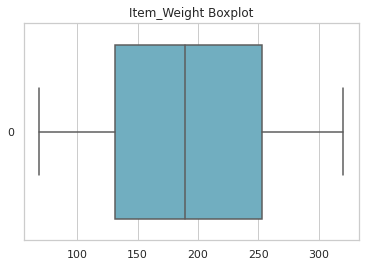

In [26]:
sns.boxplot(data=df_treino.Peso,orient="h", color = 'c')
plt.title("Item_Weight Boxplot")

Text(0.5, 1.0, 'Item_Weight Boxplot')

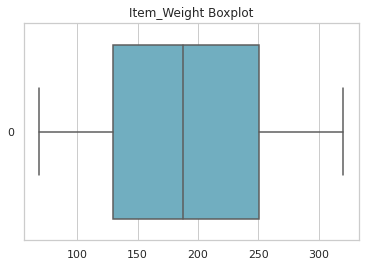

In [27]:
sns.boxplot(data=df_teste.Peso,orient="h", color = 'c')
plt.title("Item_Weight Boxplot")

Na coluna "Peso", realizamos uma normalização das células utilizando a ideia de média, obtida através de cada tipo de produto. Exemplo, pegamos todos os pesos de um produto específico, tiramos a média e adicionamos nos campos ausentes daquele produto.

In [28]:
base = df_treino[df_treino['Peso'].isnull()==True]['TipoProduto'].unique()
list_tipo_produto = []
list_media_tipo_produto = []

for x in range(len(base)):
    tipo_especifico = base[x]
    media = df_treino[df_treino['TipoProduto']==tipo_especifico].Peso.describe()['mean']
    list_tipo_produto.append(tipo_especifico)
    list_media_tipo_produto.append(media)

list_Peso = []

for y in range(df_treino.Peso.shape[0]):
    if(str(df_treino.Peso.loc[y])=='nan'):
        list_Peso.append( list_media_tipo_produto[list_tipo_produto.index(df_treino.TipoProduto.loc[y])] )
    else:
        list_Peso.append(df_treino.Peso.loc[y])
        
df_Peso = pd.DataFrame(list_Peso, columns = ['Peso'])

df_treino.Peso = df_Peso

In [29]:
base_2 = df_teste[df_teste['Peso'].isnull()==True]['TipoProduto'].unique()
list_tipo_produto_2 = []
list_media_tipo_produto_2 = []

for x in range(len(base_2)):
    tipo_especifico_2 = base_2[x]
    media_2 = df_teste[df_teste['TipoProduto']==tipo_especifico_2].Peso.describe()['mean']
    list_tipo_produto_2.append(tipo_especifico_2)
    list_media_tipo_produto_2.append(media_2)

list_Peso_2 = []

for y in range(df_teste.Peso.shape[0]):
    if(str(df_teste.Peso.loc[y])=='nan'):
        list_Peso_2.append(list_media_tipo_produto_2[list_tipo_produto_2.index(df_teste.TipoProduto.loc[y])] )
    else:
        list_Peso_2.append(df_teste.Peso.loc[y])
        
df_Peso_2 = pd.DataFrame(list_Peso_2, columns = ['Peso'])

df_teste.Peso = df_Peso_2

In [30]:
for t in range(len(list_tipo_produto)):
    print(f'O produto "{list_tipo_produto[t]}" na "tabela de treino" possui uma media "{list_media_tipo_produto[t]}"')


O produto "snacks" na "tabela de treino" possui uma media "194.81819331983806"
O produto "alcoolicos" na "tabela de treino" possui uma media "171.0049180327869"
O produto "panificacao" na "tabela de treino" possui uma media "184.15662313432836"
O produto "produtos enlatados" na "tabela de treino" possui uma media "184.58557513914656"
O produto "frutas_e_legumes" na "tabela de treino" possui uma media "198.37154072620214"
O produto "lacteo" na "tabela de treino" possui uma media "201.39103356890462"
O produto "congelada" na "tabela de treino" possui uma media "193.00591922005572"
O produto "casa" na "tabela de treino" possui uma media "200.77104743083"
O produto "cafe" na "tabela de treino" possui uma media "191.5230337078652"
O produto "refrigerante" na "tabela de treino" possui uma media "177.71189839572193"
O produto "carnes" na "tabela de treino" possui uma media "192.26016320474778"
O produto "higiene pessoal" na "tabela de treino" possui uma media "197.13470930232558"
O produto "c

In [31]:
for t in range(len(list_tipo_produto_2)):
    print(f'O produto "{list_tipo_produto_2[t]}" na "tabela de teste" possui uma media "{list_media_tipo_produto_2[t]}"')


O produto "lacteo" na "tabela de teste" possui uma media "194.3256"
O produto "panificacao" na "tabela de teste" possui uma media "184.08626373626376"
O produto "higiene pessoal" na "tabela de teste" possui uma media "198.2539285714286"
O produto "casa" na "tabela de teste" possui uma media "199.0575570342205"
O produto "outros" na "tabela de teste" possui uma media "210.14587912087913"
O produto "frutas_e_legumes" na "tabela de teste" possui uma media "197.19988425925928"
O produto "carnes" na "tabela de teste" possui uma media "190.5322222222222"
O produto "produtos enlatados" na "tabela de teste" possui uma media "185.9034818941504"
O produto "snacks" na "tabela de teste" possui uma media "190.26383458646615"
O produto "cereais" na "tabela de teste" possui uma media "204.2737113402062"
O produto "alcoolicos" na "tabela de teste" possui uma media "177.66624999999996"
O produto "congelada" na "tabela de teste" possui uma media "181.52314004376368"
O produto "refrigerante" na "tabela d

In [32]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDProduto        8523 non-null   object 
 1   Peso             8523 non-null   float64
 2   PerGordura       8523 non-null   object 
 3   Visibilidade     8523 non-null   float64
 4   TipoProduto      8523 non-null   object 
 5   PrecoMax         8523 non-null   float64
 6   IDLoja           8523 non-null   object 
 7   AnoLoja          8523 non-null   int64  
 8   TamanhoLoja      8523 non-null   object 
 9   LocalizacaoTipo  8523 non-null   object 
 10  TipoLoja         8523 non-null   object 
 11  Vendas           8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [33]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDProduto        5681 non-null   object 
 1   Peso             5681 non-null   float64
 2   PerGordura       5681 non-null   object 
 3   Visibilidade     5681 non-null   float64
 4   TipoProduto      5681 non-null   object 
 5   PrecoMax         5681 non-null   float64
 6   IDLoja           5681 non-null   object 
 7   AnoLoja          5681 non-null   int64  
 8   TamanhoLoja      5681 non-null   object 
 9   LocalizacaoTipo  5681 non-null   object 
 10  TipoLoja         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 661.6+ KB


In [34]:
df_treino.isnull().sum().sort_values(ascending=False)

IDProduto          0
Peso               0
PerGordura         0
Visibilidade       0
TipoProduto        0
PrecoMax           0
IDLoja             0
AnoLoja            0
TamanhoLoja        0
LocalizacaoTipo    0
TipoLoja           0
Vendas             0
dtype: int64

In [35]:
df_teste.isnull().sum().sort_values(ascending=False)

IDProduto          0
Peso               0
PerGordura         0
Visibilidade       0
TipoProduto        0
PrecoMax           0
IDLoja             0
AnoLoja            0
TamanhoLoja        0
LocalizacaoTipo    0
TipoLoja           0
dtype: int64

Podemos constatar que as colunas "Peso" e "TamanhoLoja" já estão normalizadas. Por último verificamos que a coluna "PerGordura" não está normalizada.

In [36]:
df_treino.head(15)

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja,Vendas
0,1A,139.500000,Baixo,1.604730,lacteo,249.8092,L1,2009,medio_porte,Sudeste,Atacado,5602.7070
1,2B,88.800000,Normal,1.927822,refrigerante,48.2692,L2,2019,medio_porte,Norte,Varejo,665.1342
2,3C,262.500000,Baixo,1.676007,carnes,141.6180,L1,2009,medio_porte,Sudeste,Atacado,3145.9050
3,4D,288.000000,Normal,0.000000,frutas_e_legumes,182.0950,L3,2008,medio_porte,Norte,MercadoBairro,1098.5700
4,5E,133.950000,Baixo,0.000000,casa,53.8614,L4,1997,grande,Norte,Atacado,1492.0578
5,6F,155.925000,Normal,0.000000,panificacao,51.4008,L2,2019,medio_porte,Norte,Varejo,834.9132
6,7G,204.750000,Normal,1.274109,snacks,57.6588,L4,1997,grande,Norte,Atacado,515.3292
7,8H,194.818193,Baixo,12.746986,snacks,107.7622,L5,1995,medio_porte,Norte,Premium,6034.1454
8,9I,243.000000,Normal,1.668711,congelada,96.9726,L6,2012,medio_porte,Sul,Atacado,1614.8979
9,10J,288.000000,Normal,9.444959,congelada,187.8214,L7,2017,medio_porte,Sul,Atacado,7065.8025


In [37]:
df_teste.head(15)

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja
0,1362J,311.250000,Baixo,0.756484,snacks,107.8622,L1,2009,medio_porte,Sudeste,Atacado
1,1537C,124.500000,normal,3.842768,lacteo,87.3198,L7,2017,medio_porte,Sul,Atacado
2,181Y,219.000000,Baixo,9.957491,outros,241.7538,L3,2008,medio_porte,Norte,MercadoBairro
3,1436F,109.725000,Baixo,1.538839,snacks,155.0340,L7,2017,medio_porte,Sul,Atacado
4,236B,194.325600,Normal,11.859931,lacteo,234.2300,L5,1995,medio_porte,Norte,Premium
5,1465I,147.000000,Normal,6.381721,frutas_e_legumes,117.1492,L8,2007,pequena,Sudeste,Atacado
6,443A,290.250000,Normal,8.260154,panificacao,50.1034,L2,2019,medio_porte,Norte,Varejo
7,1536B,184.086264,Baixo,1.578250,panificacao,81.0592,L5,1995,medio_porte,Norte,Premium
8,86H,94.575000,Normal,12.336545,snacks,95.7436,L6,2012,medio_porte,Sul,Atacado
9,411U,89.775000,Baixo,0.569843,panificacao,186.8924,L7,2017,medio_porte,Sul,Atacado


Procurando nas colunas "PerGordura", "TipoLoja" e "TipoProduto" algum item fora do comum 

In [38]:
df_treino.PerGordura.unique()

array(['Baixo', 'Normal', 'baixa gordura', 'baixo', 'normal'],
      dtype=object)

In [39]:
df_teste.PerGordura.unique()

array(['Baixo', 'normal', 'Normal', 'baixo', 'baixa gordura'],
      dtype=object)

In [40]:
df_treino.TipoLoja.unique()

array(['Atacado', 'Varejo', 'MercadoBairro', 'Premium'], dtype=object)

In [41]:
df_teste.TipoLoja.unique()

array(['Atacado', 'MercadoBairro', 'Premium', 'Varejo'], dtype=object)

In [42]:
df_treino.TipoProduto.unique()

array(['lacteo', 'refrigerante', 'carnes', 'frutas_e_legumes', 'casa',
       'panificacao', 'snacks', 'congelada', 'cafe', 'higiene pessoal',
       'alcoolicos', 'produtos enlatados', 'paes e bolos', 'cereais',
       'outros', 'peixes'], dtype=object)

In [43]:
df_teste.TipoProduto.unique()

array(['snacks', 'lacteo', 'outros', 'frutas_e_legumes', 'panificacao',
       'higiene pessoal', 'paes e bolos', 'alcoolicos', 'peixes',
       'refrigerante', 'casa', 'congelada', 'carnes',
       'produtos enlatados', 'cereais', 'cafe'], dtype=object)

In [44]:
df_treino.LocalizacaoTipo.unique()

array(['Sudeste', 'Norte', 'Sul'], dtype=object)

In [45]:
df_teste.LocalizacaoTipo.unique()

array(['Sudeste', 'Sul', 'Norte'], dtype=object)

Encontramos a necessidade de normalizar a coluna "PerGordura"

In [46]:
df_treino.PerGordura = df_treino.PerGordura.replace('Baixo', 'baixo'
                                                     ).replace('baixa gordura', 'baixo'
                                                     ).replace('Normal', 'normal')

In [47]:
df_teste.PerGordura = df_treino.PerGordura.replace('Baixo', 'baixo'
                                                     ).replace('baixa gordura', 'baixo'
                                                     ).replace('Normal', 'normal')

Realizamos a normalização da coluna "PerGordura"

In [48]:
df_treino.PerGordura.unique()

array(['baixo', 'normal'], dtype=object)

In [49]:
df_teste.PerGordura.unique()

array(['baixo', 'normal'], dtype=object)

Os dataFrame "df_treino" e "df_teste" totalmente normalizado:

In [50]:
df_treino.head(15)

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja,Vendas
0,1A,139.500000,baixo,1.604730,lacteo,249.8092,L1,2009,medio_porte,Sudeste,Atacado,5602.7070
1,2B,88.800000,normal,1.927822,refrigerante,48.2692,L2,2019,medio_porte,Norte,Varejo,665.1342
2,3C,262.500000,baixo,1.676007,carnes,141.6180,L1,2009,medio_porte,Sudeste,Atacado,3145.9050
3,4D,288.000000,normal,0.000000,frutas_e_legumes,182.0950,L3,2008,medio_porte,Norte,MercadoBairro,1098.5700
4,5E,133.950000,baixo,0.000000,casa,53.8614,L4,1997,grande,Norte,Atacado,1492.0578
5,6F,155.925000,normal,0.000000,panificacao,51.4008,L2,2019,medio_porte,Norte,Varejo,834.9132
6,7G,204.750000,normal,1.274109,snacks,57.6588,L4,1997,grande,Norte,Atacado,515.3292
7,8H,194.818193,baixo,12.746986,snacks,107.7622,L5,1995,medio_porte,Norte,Premium,6034.1454
8,9I,243.000000,normal,1.668711,congelada,96.9726,L6,2012,medio_porte,Sul,Atacado,1614.8979
9,10J,288.000000,normal,9.444959,congelada,187.8214,L7,2017,medio_porte,Sul,Atacado,7065.8025


In [51]:
df_teste.head(15)

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja
0,1362J,311.250000,baixo,0.756484,snacks,107.8622,L1,2009,medio_porte,Sudeste,Atacado
1,1537C,124.500000,normal,3.842768,lacteo,87.3198,L7,2017,medio_porte,Sul,Atacado
2,181Y,219.000000,baixo,9.957491,outros,241.7538,L3,2008,medio_porte,Norte,MercadoBairro
3,1436F,109.725000,normal,1.538839,snacks,155.0340,L7,2017,medio_porte,Sul,Atacado
4,236B,194.325600,baixo,11.859931,lacteo,234.2300,L5,1995,medio_porte,Norte,Premium
5,1465I,147.000000,normal,6.381721,frutas_e_legumes,117.1492,L8,2007,pequena,Sudeste,Atacado
6,443A,290.250000,normal,8.260154,panificacao,50.1034,L2,2019,medio_porte,Norte,Varejo
7,1536B,184.086264,baixo,1.578250,panificacao,81.0592,L5,1995,medio_porte,Norte,Premium
8,86H,94.575000,normal,12.336545,snacks,95.7436,L6,2012,medio_porte,Sul,Atacado
9,411U,89.775000,normal,0.569843,panificacao,186.8924,L7,2017,medio_porte,Sul,Atacado


Text(0.5, 1.0, 'Tipos de produto')

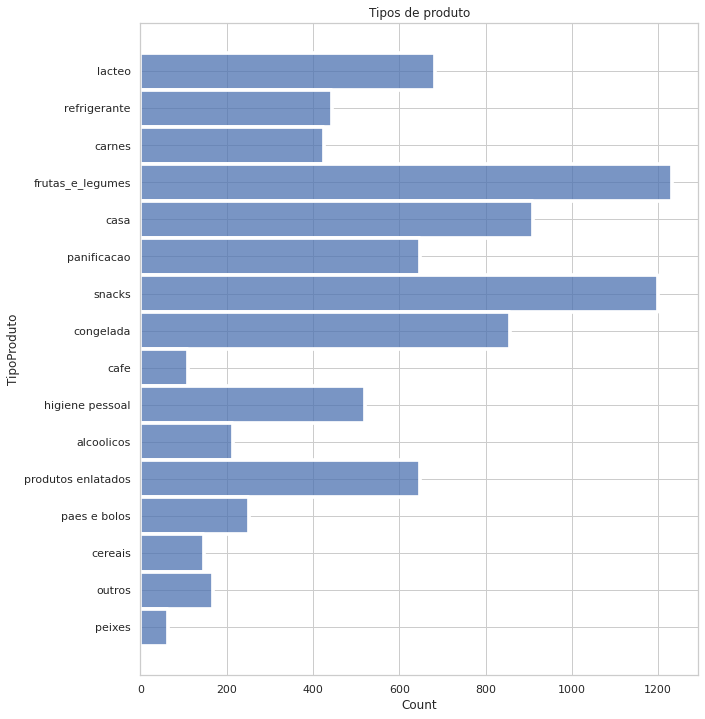

In [52]:
plt.figure(figsize=(10,12))
hist = sns.histplot(y =df_treino.TipoProduto)
plt.title("Tipos de produto")

O gráfico logo acima nos apresenta os itens da coluna "TipoProduto" e suas ocorrência.

In [53]:
df_treino.groupby(['TipoProduto']).count().IDProduto

TipoProduto
alcoolicos             214
cafe                   110
carnes                 425
casa                   910
cereais                148
congelada              856
frutas_e_legumes      1232
higiene pessoal        520
lacteo                 682
outros                 169
paes e bolos           251
panificacao            648
peixes                  64
produtos enlatados     649
refrigerante           445
snacks                1200
Name: IDProduto, dtype: int64

Text(0.5, 1.0, 'Tipos de LOJAS')

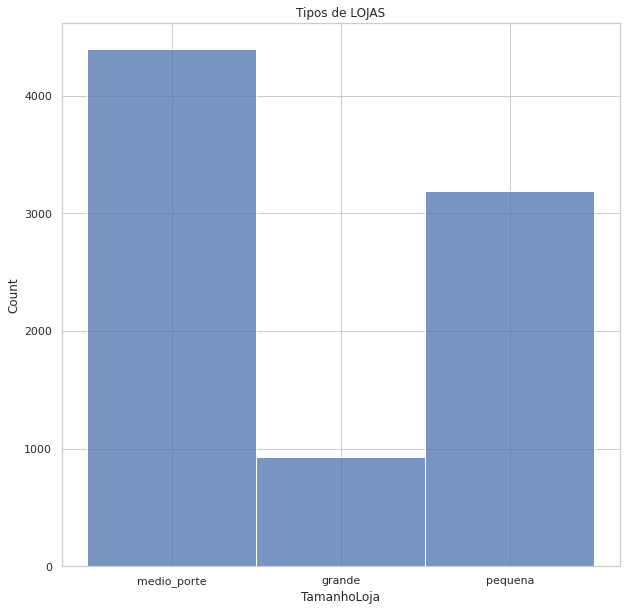

In [54]:
plt.figure(figsize=(10,10))
hist = sns.histplot(x =df_treino.TamanhoLoja)
plt.title("Tipos de LOJAS")

No gráfico acima, constatamos a quantidade de cada tipo de loja.

Text(0.5, 1.0, 'Vendas dos Itens')

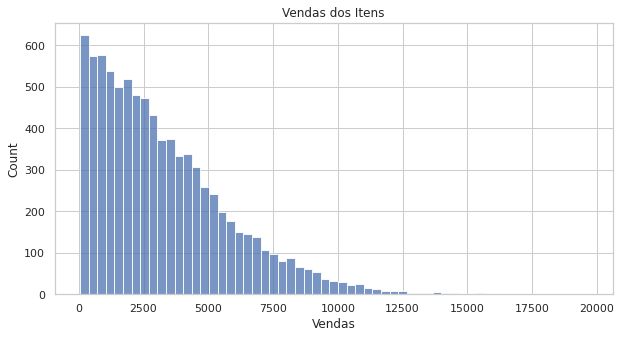

In [55]:
plt.figure(figsize=(10,5))
hist = sns.histplot(x =df_treino.Vendas)
plt.title('Vendas dos Itens')

No gráfico acima, visualizamos uma forma não muito simétrica, pois a quantidade dispara para próximo de 600 e em seguida vem diminuindo.

Text(0.5, 1.0, 'Vendas versus Visibilidade')

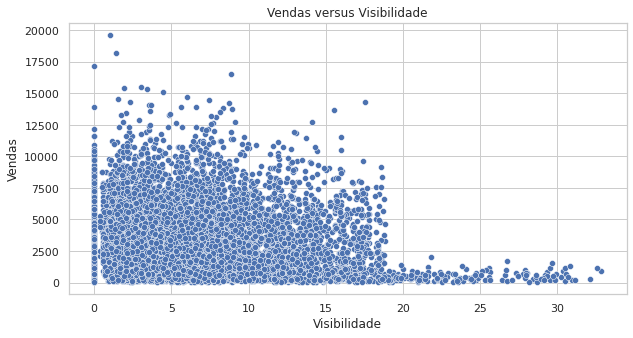

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df_treino.Visibilidade, y = df_treino.Vendas)
plt.title('Vendas versus Visibilidade')

Podemos extrair uma informação simples da figura acima, alguns produtos com pouca visibilidade não estão sendo bem vendidos. 

Text(0.5, 1.0, 'Vendas versus Pesos')

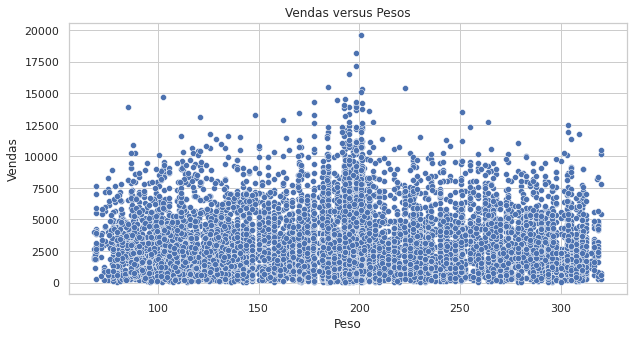

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df_treino.Peso, y = df_treino.Vendas)
plt.title('Vendas versus Pesos')

Em relação a figura acima, não conseguimos identificar uma relação/padrão entre as colunas 'Peso' e 'Vendas'.

Text(0.5, 1.0, 'Vendas versus Visibilidade')

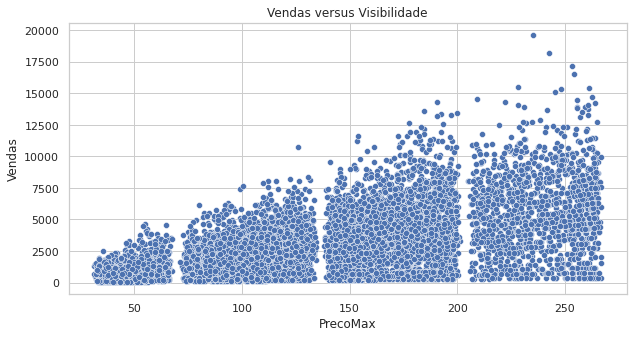

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df_treino.PrecoMax, y = df_treino.Vendas)
plt.title('Vendas versus Visibilidade')

Acredito que seja a relação de melhor retorno nessa análise. Podemos perceber que quanto maior a categoria de preço, maior a venda.

<AxesSubplot:>

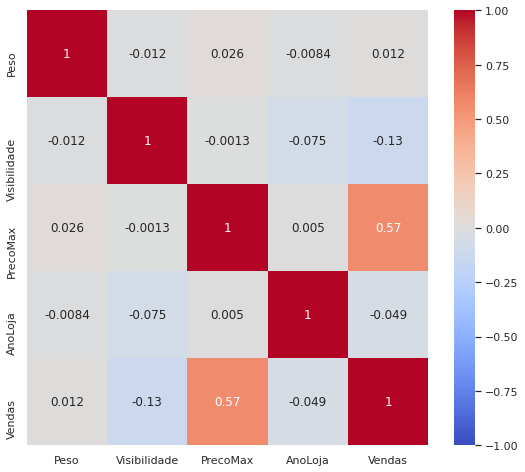

In [59]:
plt.figure(figsize=(9,8))
sns.heatmap(df_treino.corr(), annot=True ,cmap='coolwarm', vmin = -1, vmax = 1)

Mais um gráfico que reforça a nossa tese, as colunas de maior relação são 'PrecoMax' com a coluna 'Vendas'. Temos um retorno de correlação em torno de 0.5.

In [60]:
mask = np.triu(df_treino.corr())

<AxesSubplot:>

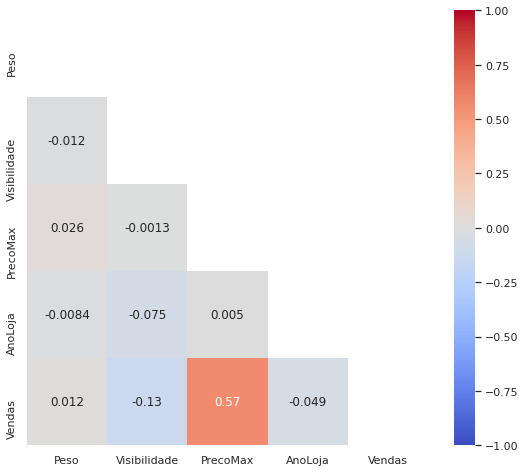

In [61]:
plt.figure(figsize=(9,8))
sns.heatmap(df_treino.corr(), annot=True ,cmap='coolwarm', vmin = -1, vmax = 1, mask = mask)

Na Matriz de correlação a parte superior a diagonal é igual a parte inferior, dessa forma poderemos simplificar a visualização.

## Modelagem preditiva

#### Criando e ajusando um modelo com o sklearn

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
modelo = LinearRegression()

In [64]:
modelo

LinearRegression()

In [65]:
y = df_treino.Vendas

In [66]:
y

0       5602.7070
1        665.1342
2       3145.9050
3       1098.5700
4       1492.0578
          ...    
8518    4167.5751
8519     823.9275
8520    1789.6704
8521    2768.3964
8522    1148.5050
Name: Vendas, Length: 8523, dtype: float64

In [67]:
x = df_treino.drop(['Vendas', 'IDProduto'], axis = 1)

In [68]:
x = pd.get_dummies(x)

Dividimos o dataframe em duas partes, x(dataframe sem Vendas e IDProduto) e y(dataframe só com a coluna de Venda)

In [69]:
modelo.fit(X=x, y=y)

LinearRegression()

In [70]:
saida_pred = modelo.predict(x)

Chamando o método 'fit' e passando os dois argumentos. ajustamos o modelo e realizamos predição.

Text(0.5, 0, 'Vendas')

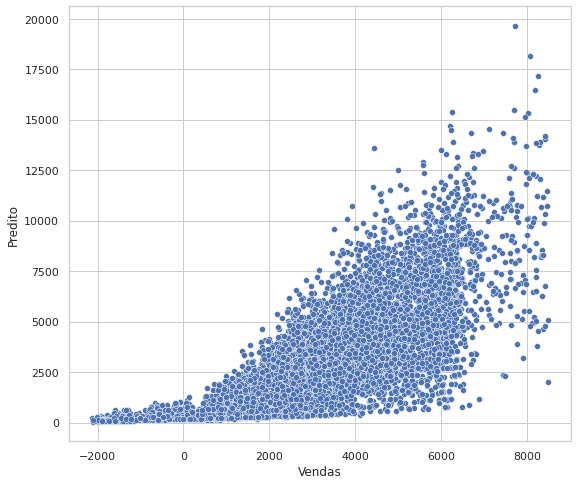

In [71]:
plt.figure(figsize=(9,8))
sns.scatterplot(y = y, x = saida_pred)
plt.ylabel('Predito')
plt.xlabel('Vendas')

O gráfico acima, aparenta ser o inverso da figura 'Vendas dos Itens'.

Text(0.5, 1.0, 'Histograma dos resíduos')

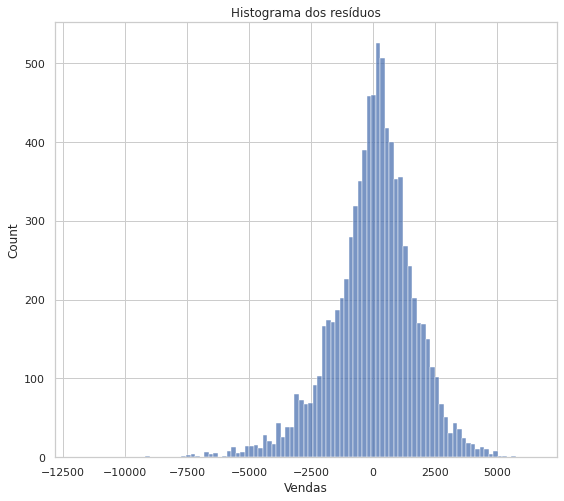

In [72]:
dado = saida_pred-y
plt.figure(figsize=(9,8))
hist = sns.histplot(dado)
plt.title("Histograma dos resíduos")

O Gráfico de resíduo, onde verificamos a diferença entre os valores preditos e a coluna de venda.

In [73]:
import statsmodels.api as sm

In [74]:
!pip install statsmodels

You should consider upgrading via the '/home/hugoleogs/.virtualenvs/my-env/bin/python -m pip install --upgrade pip' command.


In [75]:
df_treino['y_pred'] = saida_pred
xz = df_treino.drop('IDProduto', axis = 1)
xz = pd.get_dummies(xz)

In [76]:
features = [x for x in xz.columns if x not in ['Vendas', 'y_pred']]

In [77]:
modelo_treino = sm.OLS(df_treino['Vendas'],xz[features]).fit()

In [78]:
print(modelo_treino.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     378.6
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:32:58   Log-Likelihood:                -75443.
No. Observations:                8523   AIC:                         1.509e+05
Df Residuals:                    8493   BIC:                         1.512e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Peso        

Chamando o método summary, verificamos que algumas colunas não fariam diferença no resultado final. O R-squared: 0.564, possui o melhor resultado até agora.

In [79]:
df_treino

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja,Vendas,y_pred
0,1A,139.500,baixo,1.604730,lacteo,249.8092,L1,2009,medio_porte,Sudeste,Atacado,5602.7070,6026.733907
1,2B,88.800,normal,1.927822,refrigerante,48.2692,L2,2019,medio_porte,Norte,Varejo,665.1342,842.072718
2,3C,262.500,baixo,1.676007,carnes,141.6180,L1,2009,medio_porte,Sudeste,Atacado,3145.9050,3557.047873
3,4D,288.000,normal,0.000000,frutas_e_legumes,182.0950,L3,2008,medio_porte,Norte,MercadoBairro,1098.5700,1637.331216
4,5E,133.950,baixo,0.000000,casa,53.8614,L4,1997,grande,Norte,Atacado,1492.0578,1364.291053
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,360V,102.975,baixo,5.678339,snacks,214.5218,L4,1997,grande,Norte,Atacado,4167.5751,5131.666395
8519,1538D,125.700,normal,4.698243,panificacao,108.1570,L6,2012,pequena,Sul,Atacado,823.9275,2528.612240
8520,355Q,159.000,baixo,3.518627,higiene pessoal,85.1224,L9,2014,pequena,Sul,Atacado,1789.6704,2290.183650
8521,909Y,108.150,normal,14.522065,snacks,103.1332,L2,2019,medio_porte,Norte,Varejo,2768.3964,2089.097313


In [80]:
y_treino = df_treino['Vendas']
df_treino.drop(['IDProduto', 'IDLoja', 'TipoProduto', 'y_pred', 'Vendas'], axis = 1, inplace = True)

Criamos y_treino só com a coluna de 'Vendas'.

In [81]:
df_treino
x_treino = pd.get_dummies(df_treino)

Deletamos algumas colunas para criar o x_treino.

In [82]:
x_treino

,Peso,Visibilidade,PrecoMax,AnoLoja,PerGordura_baixo,PerGordura_normal,TamanhoLoja_grande,TamanhoLoja_medio_porte,TamanhoLoja_pequena,LocalizacaoTipo_Norte,LocalizacaoTipo_Sudeste,LocalizacaoTipo_Sul,TipoLoja_Atacado,TipoLoja_MercadoBairro,TipoLoja_Premium,TipoLoja_Varejo
0,139.500,1.604730,249.8092,2009,1,0,0,1,0,0,1,0,1,0,0,0
1,88.800,1.927822,48.2692,2019,0,1,0,1,0,1,0,0,0,0,0,1
2,262.500,1.676007,141.6180,2009,1,0,0,1,0,0,1,0,1,0,0,0
3,288.000,0.000000,182.0950,2008,0,1,0,1,0,1,0,0,0,1,0,0
4,133.950,0.000000,53.8614,1997,1,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,102.975,5.678339,214.5218,1997,1,0,1,0,0,1,0,0,1,0,0,0
8519,125.700,4.698243,108.1570,2012,0,1,0,0,1,0,0,1,1,0,0,0
8520,159.000,3.518627,85.1224,2014,1,0,0,0,1,0,0,1,1,0,0,0
8521,108.150,14.522065,103.1332,2019,0,1,0,1,0,1,0,0,0,0,0,1


In [83]:
y_treino

0       5602.7070
1        665.1342
2       3145.9050
3       1098.5700
4       1492.0578
          ...    
8518    4167.5751
8519     823.9275
8520    1789.6704
8521    2768.3964
8522    1148.5050
Name: Vendas, Length: 8523, dtype: float64

In [84]:
df_teste.drop(['IDProduto', 'IDLoja', 'TipoProduto'], axis = 1, inplace = True)
x_teste = pd.get_dummies(df_teste)
x_teste

,Peso,Visibilidade,PrecoMax,AnoLoja,PerGordura_baixo,PerGordura_normal,TamanhoLoja_grande,TamanhoLoja_medio_porte,TamanhoLoja_pequena,LocalizacaoTipo_Norte,LocalizacaoTipo_Sudeste,LocalizacaoTipo_Sul,TipoLoja_Atacado,TipoLoja_MercadoBairro,TipoLoja_Premium,TipoLoja_Varejo
0,311.2500,0.756484,107.8622,2009,1,0,0,1,0,0,1,0,1,0,0,0
1,124.5000,3.842768,87.3198,2017,0,1,0,1,0,0,0,1,1,0,0,0
2,219.0000,9.957491,241.7538,2008,1,0,0,1,0,1,0,0,0,1,0,0
3,109.7250,1.538839,155.0340,2017,0,1,0,1,0,0,0,1,1,0,0,0
4,194.3256,11.859931,234.2300,1995,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,157.5000,1.349647,141.3154,2007,1,0,0,0,1,0,1,0,1,0,0,0
5677,114.0000,14.299090,169.1448,2019,1,0,0,1,0,1,0,0,0,0,0,1
5678,150.0000,7.352856,118.7440,2012,0,1,0,0,1,0,0,1,1,0,0,0
5679,229.5000,0.000000,214.6218,2017,1,0,0,0,1,0,0,1,1,0,0,0


E por último, criamos x_teste  removendo as seguintes colunas 'IDProduto', 'IDLoja' e 'TipoProduto'

In [85]:
modelo_2 = LinearRegression()
modelo_2.fit(x_treino, y_treino)

LinearRegression()

In [86]:
modelo_2_pred = modelo_2.predict(x_teste)

Novamente chamamos o método fit e predict para encontrar a acurácia.

In [87]:
modelo_2_pred

array([2721.80986884, 2415.70498778, 2831.05150218, ..., 2899.70621556,
       5347.16254397, 1977.00918625])

In [88]:
modelo_acuracia = round(modelo_2.score(x_treino, y_treino)*100)
modelo_acuracia

56

E por fim, chegamos a uma acurácia de 56%

# Conclusão

Na modelagem dos dados do dataframe df_treino e df_teste, podemos refinar a normalização dos valores ausentes. Já na modelagem preditiva esse relatório obteve uma acurácia próximo dos 56%, que é muito baixo, dessa forma podemos procurar outro modelo preditivo para melhorar o nosso resultado.

Conseguimos extrair da nossa análise as seguintes observações:

* O Sacolão precisa ter um pouco mais de atenção nos itens com pouca visualização, para melhorar as vendas desses produtos.

* O Sacolão poderia dar maior ênfase nos produtos mais caros, porque são os mais vendidos. Um Exemplo seria colocar esses produtos em lugares mais expostos e com maior visibilidade.